In [135]:
from image_enhancement import image_enhancement
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [136]:
path = r"C:\Users\ahmed\Downloads\DTU.png"
img = cv2.imread(path,1) #0 define gray scale image and 1 for colour

In [137]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

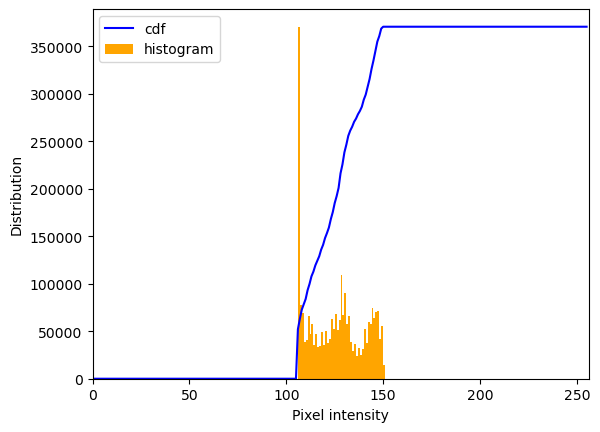

In [138]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'orange')
plt.xlim([0,256])
plt.xlabel('Pixel intensity')
plt.ylabel('Distribution')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [150]:
equ = image_enhancement.IE(img,'HSV').DSIHE() #for HE use GHE

In [115]:
#Contrast Limited Adaptive Histogram Equalization(CLAHE)
image_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
image_yuv[:,:,0] = clahe.apply(image_yuv[:,:,0])
equ = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)


In [140]:
#Min Max Contrast Stretching
image_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

min = np.min(image_yuv[:,:,0])
max = np.max(image_yuv[:,:,0])

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        image_yuv[:,:,0][i,j] = 255*(image_yuv[:,:,0][i,j]-min)/(max-min)

equ = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

In [142]:
cv2.imshow('equ.png',equ)
cv2.waitKey(0)
cv2.destroyAllWindows()

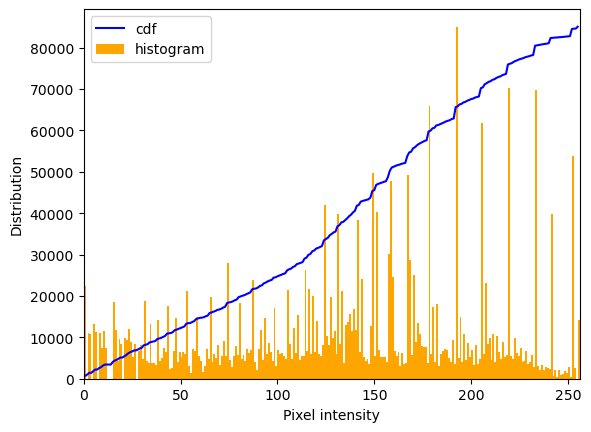

In [147]:
hist_c,bins_c = np.histogram(equ.flatten(),256,[0,256])
cdf_c = hist_c.cumsum()
cdf_normalized_c = cdf_c* float(hist_c.max()) / cdf_c.max()
plt.plot(cdf_normalized_c, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'orange')
plt.xlim([0,256])
plt.xlabel('Pixel intensity')
plt.ylabel('Distribution')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [151]:
Z1 = img.mean()
Z2 = equ.mean()
AMBE = abs(Z1-Z2)

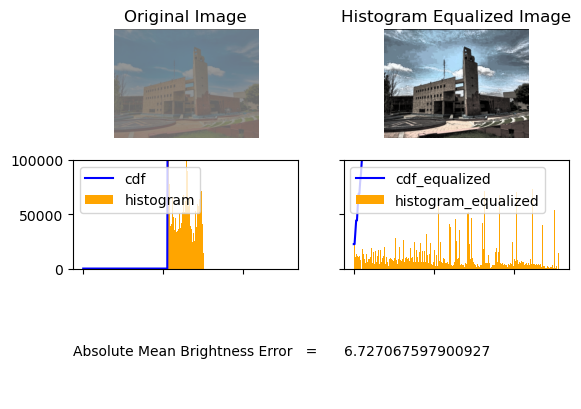

In [152]:
fig, axs = plt.subplots(3, 2)

axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(equ, cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('Histogram Equalized Image')


axs[1, 0].plot(cdf, color = 'b')
axs[1, 0].set_ylim([0,100000])
axs[1, 0].hist(img.flatten(),256,[0,256], color = 'orange')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')


axs[1, 1].plot(cdf_c, color = 'b')
axs[1, 1].set_ylim([0,100000])
axs[1, 1].hist(equ.flatten(),256,[0,256], color = 'orange')
axs[1, 1].legend(('cdf_equalized','histogram_equalized'), loc = 'upper left')

axs[2,0].axis('off')
axs[2,0].text(0,0.4,'Absolute Mean Brightness Error   = ')

axs[2,1].axis('off')
axs[2,1].text(0,0.4,AMBE)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()